# Regresión lineal

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions2 import *

In [38]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a) 
Implementar un modelo de regresión lineal con regularización L-2, que estime el desempeño de un estudiante en base a los datos existentes

In [39]:
# data = one_hot_encoding(data, 'extracurricular_activities')
data = data.astype({'extracurricular_activities': 'int'})
train_data, test_data = train_test_split(data, test_size=0.2, seed=42)
train_data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,10.000000,7.512345,5.072058,8.775325,14,1
1,10.000000,7.645378,5.266626,8.351701,6,1
2,7.423695,7.096499,3.071855,8.498025,2,1
3,7.725092,6.454375,3.299192,9.913947,9,0
4,4.621869,7.731830,2.091205,4.052463,17,0
...,...,...,...,...,...,...
1115,5.713498,8.401831,5.314130,4.808138,16,0
1116,6.974535,6.644282,4.947815,5.392057,2,0
1117,6.844562,7.629650,4.989611,6.980204,9,0
1118,6.088489,8.681235,5.776701,8.484583,9,0


In [40]:
# implement linear regression with L2 regularization
X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

# X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
# X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_test

(1120, 5) (1120,) (280, 5) (280,)


,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,8.551087,5.289003,6.470879,8,1
1,7.409559,2.192232,5.832088,4,1
2,6.289469,3.254488,4.000000,7,0
3,7.965828,2.160566,5.326978,9,0
4,7.313633,2.124937,9.395151,9,0
...,...,...,...,...,...
275,6.982430,4.037566,8.058580,8,0
276,6.515991,5.421584,4.686612,7,0
277,8.433206,2.694012,8.559270,14,1
278,6.049597,3.582731,7.965237,4,1


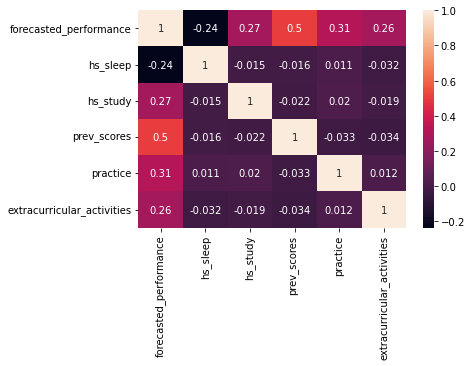

In [41]:
# heatmap de correlacion
import seaborn as sns
sns.heatmap(data.corr(), annot=True)
plt.show()

mse(train) = 1.601232734954706
mse(test) = 1.5220099959558222


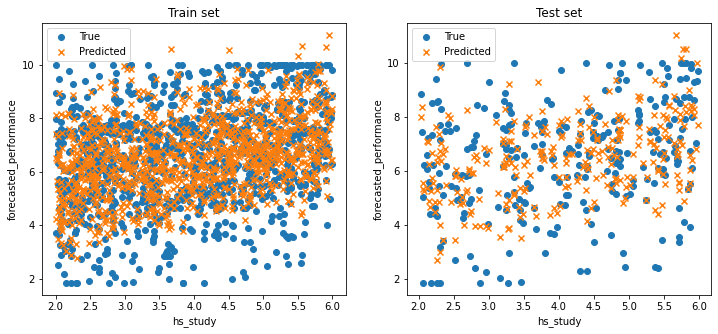

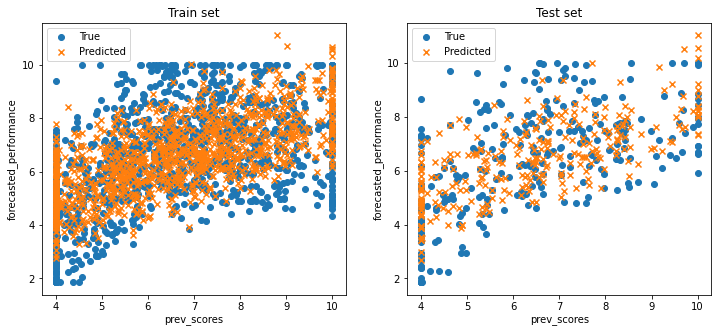

In [42]:
# Train model
W = fit_ridge_regression(X_train, y_train, 0.1)

# Predict
y_pred = predict_linear_regression(X_train, W)
# print("y_pred.shape :", y_pred.shape)
# print("y_train.shape :", y_train.shape)

# Evaluate
train_error = mse(y_train, y_pred)
print("mse(train) =", train_error)

# on test set
y_pred_test = predict_linear_regression(X_test, W)
test_error = mse(y_test, y_pred_test)
print("mse(test) =", test_error)

# Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_train['hs_study'], y_train, label='True')
axs[0].scatter(X_train['hs_study'], y_pred, label='Predicted', marker='x')
axs[0].legend()
axs[0].set_xlabel('hs_study')
axs[0].set_ylabel('forecasted_performance')
axs[0].set_title('Train set')
axs[1].scatter(X_test['hs_study'], y_test, label='True')
axs[1].scatter(X_test['hs_study'], y_pred_test, label='Predicted', marker='x')
axs[1].legend()
axs[1].set_xlabel('hs_study')
axs[1].set_ylabel('forecasted_performance')
axs[1].set_title('Test set')
plt.show()

# otro grafico usando prev_scores
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_train['prev_scores'], y_train, label='True')
axs[0].scatter(X_train['prev_scores'], y_pred, label='Predicted', marker='x')
axs[0].legend()
axs[0].set_xlabel('prev_scores')
axs[0].set_ylabel('forecasted_performance')
axs[0].set_title('Train set')
axs[1].scatter(X_test['prev_scores'], y_test, label='True')
axs[1].scatter(X_test['prev_scores'], y_pred_test, label='Predicted', marker='x')
axs[1].legend()
axs[1].set_xlabel('prev_scores')
axs[1].set_ylabel('forecasted_performance')
axs[1].set_title('Test set')
plt.show()

In [43]:
x = data.drop(columns=['forecasted_performance'])
y = data['forecasted_performance'].values
lmbdas = np.logspace(-11, 1, 50)

mse_train, mse_test = cross_validation_ridge(x, y, lmbdas, k=10)

x_shuffled[0.shape] = (1400, 5)
y_shuffled[0.shape] = (1400,)
x_shuffled[1.shape] = (1400, 5)
y_shuffled[1.shape] = (1400,)
x_shuffled[2.shape] = (1400, 5)
y_shuffled[2.shape] = (1400,)
x_shuffled[3.shape] = (1400, 5)
y_shuffled[3.shape] = (1400,)
x_shuffled[4.shape] = (1400, 5)
y_shuffled[4.shape] = (1400,)
x_shuffled[5.shape] = (1400, 5)
y_shuffled[5.shape] = (1400,)
x_shuffled[6.shape] = (1400, 5)
y_shuffled[6.shape] = (1400,)
x_shuffled[7.shape] = (1400, 5)
y_shuffled[7.shape] = (1400,)
x_shuffled[8.shape] = (1400, 5)
y_shuffled[8.shape] = (1400,)
x_shuffled[9.shape] = (1400, 5)
y_shuffled[9.shape] = (1400,)
x_shuffled[10.shape] = (1400, 5)
y_shuffled[10.shape] = (1400,)
x_shuffled[11.shape] = (1400, 5)
y_shuffled[11.shape] = (1400,)
x_shuffled[12.shape] = (1400, 5)
y_shuffled[12.shape] = (1400,)
x_shuffled[13.shape] = (1400, 5)
y_shuffled[13.shape] = (1400,)
x_shuffled[14.shape] = (1400, 5)
y_shuffled[14.shape] = (1400,)
x_shuffled[15.shape] = (1400, 5)
y_shuffled[15.shape] = (140

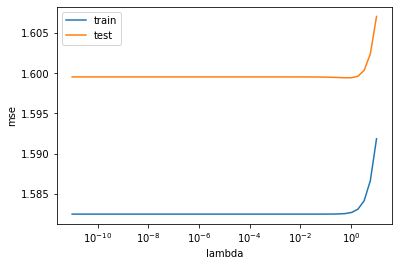

Lambda that minimizes MSE: 0.5963623316594636
Minimum MSE: 1.599393032262656


In [47]:
# calculo el mse promedio para cada lambda haciendo el promedio de los k-folds
mse_train_mean = mse_train.mean(axis=1)
mse_test_mean = mse_test.mean(axis=1)

#grafico
plt.plot(lmbdas, mse_train_mean, label='train')
plt.plot(lmbdas, mse_test_mean, label='test')
#plot min on graph and its values
# plt.scatter(*min_mse_values, c='r', label='min mse')
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('mse')
plt.legend()
plt.show()

# best lambda
lmbda_opt = lmbdas[np.argmin(mse_test.mean(axis=1))]
lmbda_opt_mse = mse_test.mean(axis=1).min()
# k_opt = np.argmin(mse_test.mean(axis=1))


print(f'Lambda that minimizes MSE: {lmbda_opt}')
print(f'Minimum MSE: {lmbda_opt_mse}')
# print(f'Optimal k: {k_opt}')

### c)
Reportar el $RMSE$, $MAE$ y $R^2$ del modelo desarrollado (es decir, con los parámetros e hiperparámetros óptimos) evaluados mediante cross-validation. Además, graficar $\hat{y}$ vs. $y$ para los datos “held out” de cada uno de los folds de cross-validation. Dicho gráfico debe tener una recta de pendiente 1 que pase por el origen, para poder visualizar mejor las desviaciones de las estimaciones del modelo vs. los datos reales.

In [45]:
# RMSE, MAE, R2 del modelo optimo, mediante cross validation

